In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.insert(0, '..')

In [3]:
import pandas as pd
from tqdm.notebook import tqdm

In [4]:
from src.features.embeddings import get_specialist_id, get_specialist_ids

In [5]:
df = pd.read_csv('../data/data_cleaned.csv', index_col=0)

/tmp/ipykernel_8908/689184570.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/data_cleaned.csv', index_col=0)


In [6]:
df

,code,partner_id,clinic_id,specialist_id,schedule_type,status,phone,name,gender,address,province_id,age,reason_combind
0,1,2,0,22,1.0,2,0978868343,Nguyễn Mạnh Kiểm,NaN,La Khê - Hà Đông - Hà Nội,1.0,38,Khám tiêu hóa
1,3,2,49,1,1.0,2,0961802111,Trịnh Thị Màu,NaN,Từ Liêm-Hà Nội,1.0,29,"Đau lưng nhiều,ngồi lâu cứng lưng"
2,4,4,0,3,1.0,2,0969193662,Trần Thị Thao,NaN,Vinh-Nghệ An,40.0,29,"Hở van tim 3 lá,ngoại tâm thu"
3,5,17,3,3,1.0,2,0982398253,Nguyễn Đức Toàn,NaN,Sa Pa -Lào Cai,10.0,40,"Đau tức ngực bên trái,cảm giác hồi hộp"
4,7,17,3,3,1.0,2,0904842488,Lê Thị Tuyết Sinh,NaN,Hoà Bình,NaN,70,Cao huyết áp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154467,mc92,10,1543,1,1.0,2,982760266,Nguyễn Văn Tuyến,0.0,0,27.0,0,Khám lại khớp gối\n
154468,mc93,111,1822,17,1.0,2,962238486,Nguyễn Thị Nguyệt,1.0,0,74.0,0,0
154469,mc94,8,1655,10,1.0,2,334275683,Lê Mai Chjnh,1.0,NaN,1.0,0,Cấy que tranh thai
154471,mc96,111,1822,17,1.0,2,367413628,Nguyễn Thị Liễu,1.0,0,66.0,0,Tái khám


In [7]:
df['reason_combind'] = df['reason_combind'].str.lower().str.strip()

In [8]:
df

,code,partner_id,clinic_id,specialist_id,schedule_type,status,phone,name,gender,address,province_id,age,reason_combind
0,1,2,0,22,1.0,2,0978868343,Nguyễn Mạnh Kiểm,NaN,La Khê - Hà Đông - Hà Nội,1.0,38,khám tiêu hóa
1,3,2,49,1,1.0,2,0961802111,Trịnh Thị Màu,NaN,Từ Liêm-Hà Nội,1.0,29,"đau lưng nhiều,ngồi lâu cứng lưng"
2,4,4,0,3,1.0,2,0969193662,Trần Thị Thao,NaN,Vinh-Nghệ An,40.0,29,"hở van tim 3 lá,ngoại tâm thu"
3,5,17,3,3,1.0,2,0982398253,Nguyễn Đức Toàn,NaN,Sa Pa -Lào Cai,10.0,40,"đau tức ngực bên trái,cảm giác hồi hộp"
4,7,17,3,3,1.0,2,0904842488,Lê Thị Tuyết Sinh,NaN,Hoà Bình,NaN,70,cao huyết áp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154467,mc92,10,1543,1,1.0,2,982760266,Nguyễn Văn Tuyến,0.0,0,27.0,0,khám lại khớp gối
154468,mc93,111,1822,17,1.0,2,962238486,Nguyễn Thị Nguyệt,1.0,0,74.0,0,0
154469,mc94,8,1655,10,1.0,2,334275683,Lê Mai Chjnh,1.0,NaN,1.0,0,cấy que tranh thai
154471,mc96,111,1822,17,1.0,2,367413628,Nguyễn Thị Liễu,1.0,0,66.0,0,tái khám


In [9]:
count_tai_kham = (df['reason_combind'] == "tái khám").sum()
print(f"Number of rows with 'tai kham': {count_tai_kham}")

Number of rows with 'tai kham': 7063


In [10]:
df_filtered = df[df['reason_combind'] != 'tái khám']

In [11]:
df_filtered.shape

(136106, 13)

In [12]:
df_filtered.head()

,code,partner_id,clinic_id,specialist_id,schedule_type,status,phone,name,gender,address,province_id,age,reason_combind
0,1,2,0,22,1.0,2,0978868343,Nguyễn Mạnh Kiểm,NaN,La Khê - Hà Đông - Hà Nội,1.0,38,khám tiêu hóa
1,3,2,49,1,1.0,2,0961802111,Trịnh Thị Màu,NaN,Từ Liêm-Hà Nội,1.0,29,"đau lưng nhiều,ngồi lâu cứng lưng"
2,4,4,0,3,1.0,2,0969193662,Trần Thị Thao,NaN,Vinh-Nghệ An,40.0,29,"hở van tim 3 lá,ngoại tâm thu"
3,5,17,3,3,1.0,2,0982398253,Nguyễn Đức Toàn,NaN,Sa Pa -Lào Cai,10.0,40,"đau tức ngực bên trái,cảm giác hồi hộp"
4,7,17,3,3,1.0,2,0904842488,Lê Thị Tuyết Sinh,NaN,Hoà Bình,NaN,70,cao huyết áp


In [13]:
df_filtered.describe()

,partner_id,clinic_id,specialist_id,schedule_type,status,gender,province_id,age
count,136106.000000,136106.000000,136106.000000,135931.000000,136106.0,132851.000000,135927.000000,136106.000000
mean,89.339882,917.502814,18.960406,0.999993,2.0,0.523564,31.795530,27.465262
std,102.395916,860.236075,14.733063,0.016498,0.0,0.499446,31.958318,23.090929
min,0.000000,0.000000,0.000000,-1.000000,2.0,0.000000,1.000000,-70.000000
25%,10.000000,174.000000,4.000000,1.000000,2.0,0.000000,1.000000,0.000000
50%,49.000000,611.000000,18.000000,1.000000,2.0,1.000000,26.000000,28.000000
75%,112.000000,1539.000000,27.000000,1.000000,2.0,1.000000,68.000000,44.000000
max,530.000000,4134.000000,116.000000,4.000000,2.0,1.000000,96.000000,230.000000


In [14]:
features = df_filtered.drop(columns=['code', 'clinic_id', 'schedule_type', 'phone', 'name', 'address'])

In [15]:
features['province_id'] = features['province_id'].fillna(-1).astype(int)

In [16]:
features

,partner_id,specialist_id,status,gender,province_id,age,reason_combind
0,2,22,2,NaN,1,38,khám tiêu hóa
1,2,1,2,NaN,1,29,"đau lưng nhiều,ngồi lâu cứng lưng"
2,4,3,2,NaN,40,29,"hở van tim 3 lá,ngoại tâm thu"
3,17,3,2,NaN,10,40,"đau tức ngực bên trái,cảm giác hồi hộp"
4,17,3,2,NaN,-1,70,cao huyết áp
...,...,...,...,...,...,...,...
154465,414,1,2,1.0,1,0,"trượt chân, ngã ngồi đau khu xương cụt"
154466,32,11,2,0.0,1,0,mụn trứng cá
154467,10,1,2,0.0,27,0,khám lại khớp gối
154468,111,17,2,1.0,74,0,0


In [17]:
features.describe()

,partner_id,specialist_id,status,gender,province_id,age
count,136106.000000,136106.000000,136106.0,132851.000000,136106.000000,136106.000000
mean,89.339882,18.960406,2.0,0.523564,31.752399,27.465262
std,102.395916,14.733063,0.0,0.499446,31.959404,23.090929
min,0.000000,0.000000,2.0,0.000000,-1.000000,-70.000000
25%,10.000000,4.000000,2.0,0.000000,1.000000,0.000000
50%,49.000000,18.000000,2.0,1.000000,26.000000,28.000000
75%,112.000000,27.000000,2.0,1.000000,68.000000,44.000000
max,530.000000,116.000000,2.0,1.000000,96.000000,230.000000


In [18]:
features.shape

(136106, 7)

In [19]:
# features = features[features['specialist_id'] != 0]

In [20]:
features

,partner_id,specialist_id,status,gender,province_id,age,reason_combind
0,2,22,2,NaN,1,38,khám tiêu hóa
1,2,1,2,NaN,1,29,"đau lưng nhiều,ngồi lâu cứng lưng"
2,4,3,2,NaN,40,29,"hở van tim 3 lá,ngoại tâm thu"
3,17,3,2,NaN,10,40,"đau tức ngực bên trái,cảm giác hồi hộp"
4,17,3,2,NaN,-1,70,cao huyết áp
...,...,...,...,...,...,...,...
154465,414,1,2,1.0,1,0,"trượt chân, ngã ngồi đau khu xương cụt"
154466,32,11,2,0.0,1,0,mụn trứng cá
154467,10,1,2,0.0,27,0,khám lại khớp gối
154468,111,17,2,1.0,74,0,0


In [21]:
count_zero = (features['reason_combind'] == '0').sum()
count_zero

np.int64(5180)

In [22]:
features = features[features['reason_combind'] != '0']

In [23]:
features

,partner_id,specialist_id,status,gender,province_id,age,reason_combind
0,2,22,2,NaN,1,38,khám tiêu hóa
1,2,1,2,NaN,1,29,"đau lưng nhiều,ngồi lâu cứng lưng"
2,4,3,2,NaN,40,29,"hở van tim 3 lá,ngoại tâm thu"
3,17,3,2,NaN,10,40,"đau tức ngực bên trái,cảm giác hồi hộp"
4,17,3,2,NaN,-1,70,cao huyết áp
...,...,...,...,...,...,...,...
154464,410,26,2,0.0,42,0,rối loạn
154465,414,1,2,1.0,1,0,"trượt chân, ngã ngồi đau khu xương cụt"
154466,32,11,2,0.0,1,0,mụn trứng cá
154467,10,1,2,0.0,27,0,khám lại khớp gối


In [24]:
features.to_csv('../data/features.csv')

In [25]:
## combind suc khoe tam than tu xa to suc khoe tam than and bac si da lieu tu xa to da lieu
features['specialist_id'] = features['specialist_id'].replace(45, 27)
features['specialist_id'] = features['specialist_id'].replace(44, 11)
features['specialist_id'] = features['specialist_id'].replace(46, 1)
features['specialist_id'] = features['specialist_id'].replace(52, 3)
features['specialist_id'] = features['specialist_id'].replace(54, 4)
features['specialist_id'] = features['specialist_id'].replace(72, 11)
features['specialist_id'] = features['specialist_id'].replace(56, 18)
features['specialist_id'] = features['specialist_id'].replace(10, 19)
features['specialist_id'] = features['specialist_id'].replace(48, 22)
features['specialist_id'] = features['specialist_id'].replace(9, 22)
features['specialist_id'] = features['specialist_id'].replace(75, 26)
features['specialist_id'] = features['specialist_id'].replace(65, 27)
features['specialist_id'] = features['specialist_id'].replace(66, 27)
features['specialist_id'] = features['specialist_id'].replace(53, 5)
features['specialist_id'] = features['specialist_id'].replace(31, 17)
features['specialist_id'] = features['specialist_id'].replace(24, 1)
features['specialist_id'] = features['specialist_id'].replace(28, 22)

/tmp/ipykernel_8908/4174957349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['specialist_id'] = features['specialist_id'].replace(45, 27)
/tmp/ipykernel_8908/4174957349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['specialist_id'] = features['specialist_id'].replace(44, 11)
/tmp/ipykernel_8908/4174957349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [26]:
features['specialist_id'].unique()

array([ 22,   1,   3,  18,   7,   4,   5,  19,   0,  17,  15,  26,  14,
        20,  11,   8,  27,  12,  29,  32,  30,  21,  33,  36,  13,  38,
        40,  39,  37,  42,  34,  23,  43,  47,  50,  58,  55,  49,  51,
        63,  62,  67,  59,  61,  60,  68,  69,  70,  41,  73,  71,  74,
        64,  92,  96,  99, 101, 102,  94,  93, 100,  82,  76,  79,  97,
       103,  77, 116, 107,  81, 108])

### Deduplicate using semhash

In [27]:
from semhash import SemHash
from model2vec import StaticModel

m2v_model = StaticModel.from_pretrained('BookingCare/gte-multilingual-base-v2.1-m2v')

In [28]:
features.shape

(130926, 7)

In [29]:
features.head()

,partner_id,specialist_id,status,gender,province_id,age,reason_combind
0,2,22,2,NaN,1,38,khám tiêu hóa
1,2,1,2,NaN,1,29,"đau lưng nhiều,ngồi lâu cứng lưng"
2,4,3,2,NaN,40,29,"hở van tim 3 lá,ngoại tâm thu"
3,17,3,2,NaN,10,40,"đau tức ngực bên trái,cảm giác hồi hộp"
4,17,3,2,NaN,-1,70,cao huyết áp


In [30]:
selected_ids = [1, 3, 4, 5, 11, 15, 17, 18, 19, 21, 22, 26, 27, 29, 32, 43, 67, 33]
features = features[features['specialist_id'].isin(selected_ids)]
features.shape
features.head()

,partner_id,specialist_id,status,gender,province_id,age,reason_combind
0,2,22,2,NaN,1,38,khám tiêu hóa
1,2,1,2,NaN,1,29,"đau lưng nhiều,ngồi lâu cứng lưng"
2,4,3,2,NaN,40,29,"hở van tim 3 lá,ngoại tâm thu"
3,17,3,2,NaN,10,40,"đau tức ngực bên trái,cảm giác hồi hộp"
4,17,3,2,NaN,-1,70,cao huyết áp


### Explore Data Analysis

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='specialist_id', ylabel='count'>

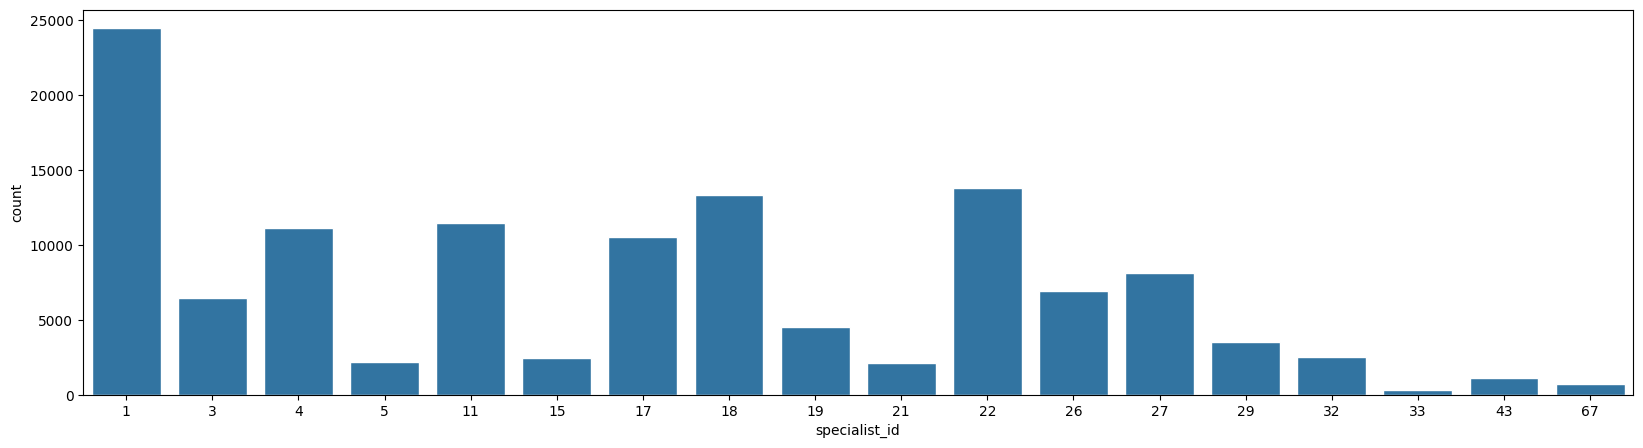

In [32]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.set_theme(style="whitegrid")
sns.countplot(x=features['specialist_id'])

In [33]:
features['specialist_id'].unique()

array([22,  1,  3, 18,  4,  5, 19, 17, 15, 26, 11, 27, 29, 32, 21, 33, 43,
       67])

In [34]:
len(features['specialist_id'].unique())

18

In [35]:
class_counts = features['specialist_id'].value_counts()
print(f'number of samples per class: {class_counts}')

number of samples per class: specialist_id
1     24453
22    13746
18    13298
11    11419
4     11088
17    10515
27     8132
26     6883
3      6452
19     4535
29     3486
32     2523
15     2463
5      2141
21     2104
43     1138
67      701
33      319
Name: count, dtype: int64


In [36]:
top_20_class = class_counts[:20]

In [37]:
top_20_class

specialist_id
1     24453
22    13746
18    13298
11    11419
4     11088
17    10515
27     8132
26     6883
3      6452
19     4535
29     3486
32     2523
15     2463
5      2141
21     2104
43     1138
67      701
33      319
Name: count, dtype: int64

In [38]:
top_20_class.keys()

Index([1, 22, 18, 11, 4, 17, 27, 26, 3, 19, 29, 32, 15, 5, 21, 43, 67, 33], dtype='int64', name='specialist_id')

In [39]:
import json

specialist_map = json.load(open('../data/specialist.json', 'r'))
specialist_map

{'1': 'cơ xương khớp',
 '2': 'tư vấn xét nghiệm',
 '3': 'tim mạch',
 '4': 'tai mũi họng',
 '5': 'nhi khoa',
 '7': 'chụp cộng hưởng từ',
 '8': 'chụp cắt lớp vi tính',
 '9': 'nội soi tiêu hóa',
 '10': 'siêu âm thai',
 '11': 'da liễu',
 '12': 'hiếm muộn',
 '13': 'ngoại khoa',
 '14': 'fus-mri',
 '15': 'ung bướu',
 '17': 'nội khoa',
 '18': 'thần kinh',
 '19': 'sản phụ khoa',
 '20': 'chụp pet/ct',
 '21': 'tiểu đường - nội tiết',
 '22': 'tiêu hoá',
 '23': 'bác sĩ từ xa qua video',
 '24': 'cột sống',
 '25': 'khám chuyên gia',
 '26': 'nam học',
 '27': 'sức khỏe tâm thần',
 '28': 'bệnh viêm gan',
 '29': 'chuyên khoa mắt',
 '30': 'phục hồi chức năng',
 '31': 'khám tổng quát',
 '32': 'thận - tiết niệu',
 '33': 'nha khoa',
 '34': 'hô hấp',
 '35': 'khoa 1c - bệnh viện việt đức',
 '36': 'dị ứng miễn dịch',
 '37': 'bệnh viện da liễu hà nội',
 '38': 'phẫu thuật hàm mặt - tạo hình thẩm mỹ',
 '39': 'y học cổ truyền',
 '40': 'châm cứu',
 '41': 'bác sĩ gia đình',
 '42': 'tạo hình hàm mặt',
 '43': 'hô hấp -

In [40]:
top_20_class_df = top_20_class.reset_index()

In [41]:
top_20_class_df['specialist_name'] = top_20_class_df['specialist_id'].astype(str).map(specialist_map)

In [42]:
top_20_class_df

,specialist_id,count,specialist_name
0,1,24453,cơ xương khớp
1,22,13746,tiêu hoá
2,18,13298,thần kinh
3,11,11419,da liễu
4,4,11088,tai mũi họng
5,17,10515,nội khoa
6,27,8132,sức khỏe tâm thần
7,26,6883,nam học
8,3,6452,tim mạch
9,19,4535,sản phụ khoa


In [43]:
id_name = top_20_class_df[['specialist_id', 'specialist_name']].set_index('specialist_name')['specialist_id'].to_dict()

In [44]:
id_name

{'cơ xương khớp': 1,
 'tiêu hoá': 22,
 'thần kinh': 18,
 'da liễu': 11,
 'tai mũi họng': 4,
 'nội khoa': 17,
 'sức khỏe tâm thần': 27,
 'nam học': 26,
 'tim mạch': 3,
 'sản phụ khoa': 19,
 'chuyên khoa mắt': 29,
 'thận - tiết niệu': 32,
 'ung bướu': 15,
 'nhi khoa': 5,
 'tiểu đường - nội tiết': 21,
 'hô hấp - phổi': 43,
 'vô sinh - hiếm muộn': 67,
 'nha khoa': 33}

In [45]:
len(id_name)

18

In [46]:
top_20_class_df.specialist_name

0             cơ xương khớp
1                  tiêu hoá
2                 thần kinh
3                   da liễu
4              tai mũi họng
5                  nội khoa
6         sức khỏe tâm thần
7                   nam học
8                  tim mạch
9              sản phụ khoa
10          chuyên khoa mắt
11         thận - tiết niệu
12                 ung bướu
13                 nhi khoa
14    tiểu đường - nội tiết
15            hô hấp - phổi
16      vô sinh - hiếm muộn
17                 nha khoa
Name: specialist_name, dtype: object

In [47]:
total_schedule_over_top_20_specialist = top_20_class_df['count'].sum()
print(f"Total schedule over top 10 specialist: {total_schedule_over_top_20_specialist}")

Total schedule over top 10 specialist: 125396


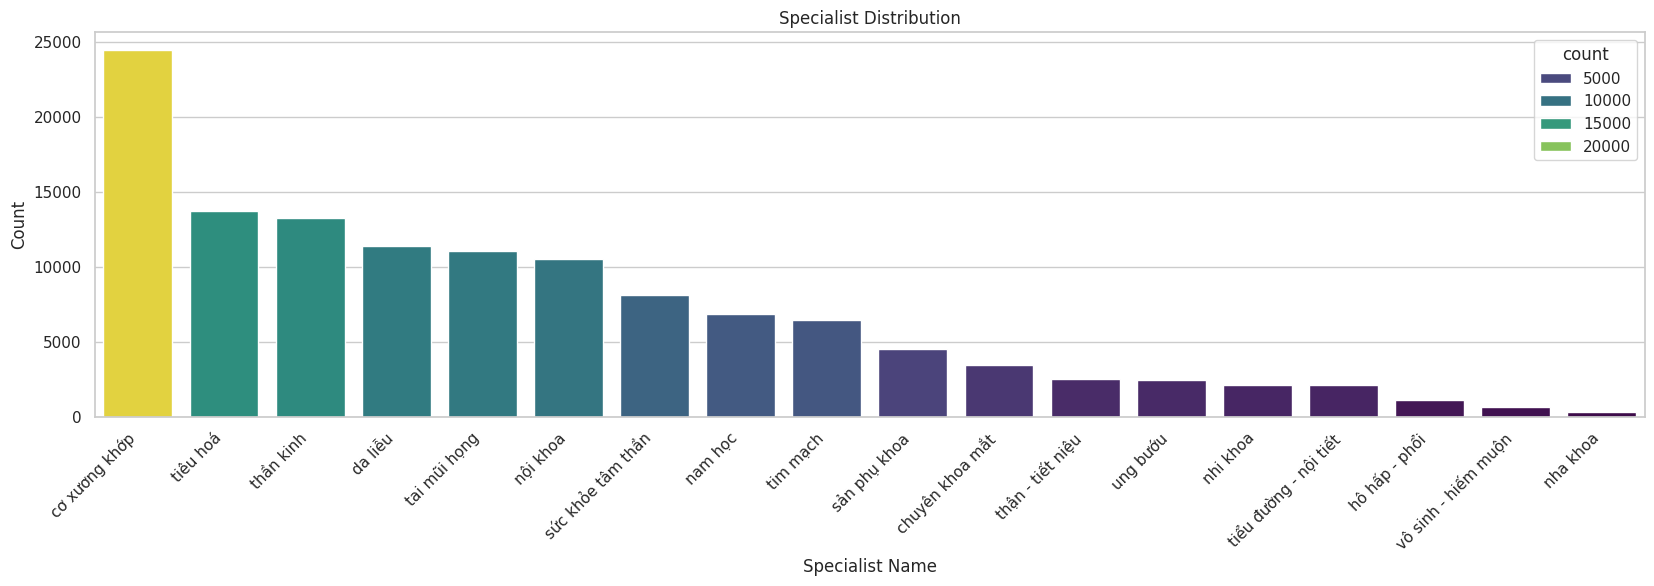

In [48]:
fig, ax = plt.subplots(figsize=(20, 5))

sns.set_theme(style="whitegrid")
sns.barplot(x="specialist_name", y="count", data=top_20_class_df, palette="viridis", hue="count")
plt.xticks(rotation=45, ha='right')

plt.xlabel('Specialist Name')
plt.ylabel('Count')
plt.title('Specialist Distribution')

plt.show()

In [49]:
average_schedule_over_specialist = total_schedule_over_top_20_specialist / 20

print(f"Average schedule over specialist: {average_schedule_over_specialist: .2f}")

Average schedule over specialist:  6269.80


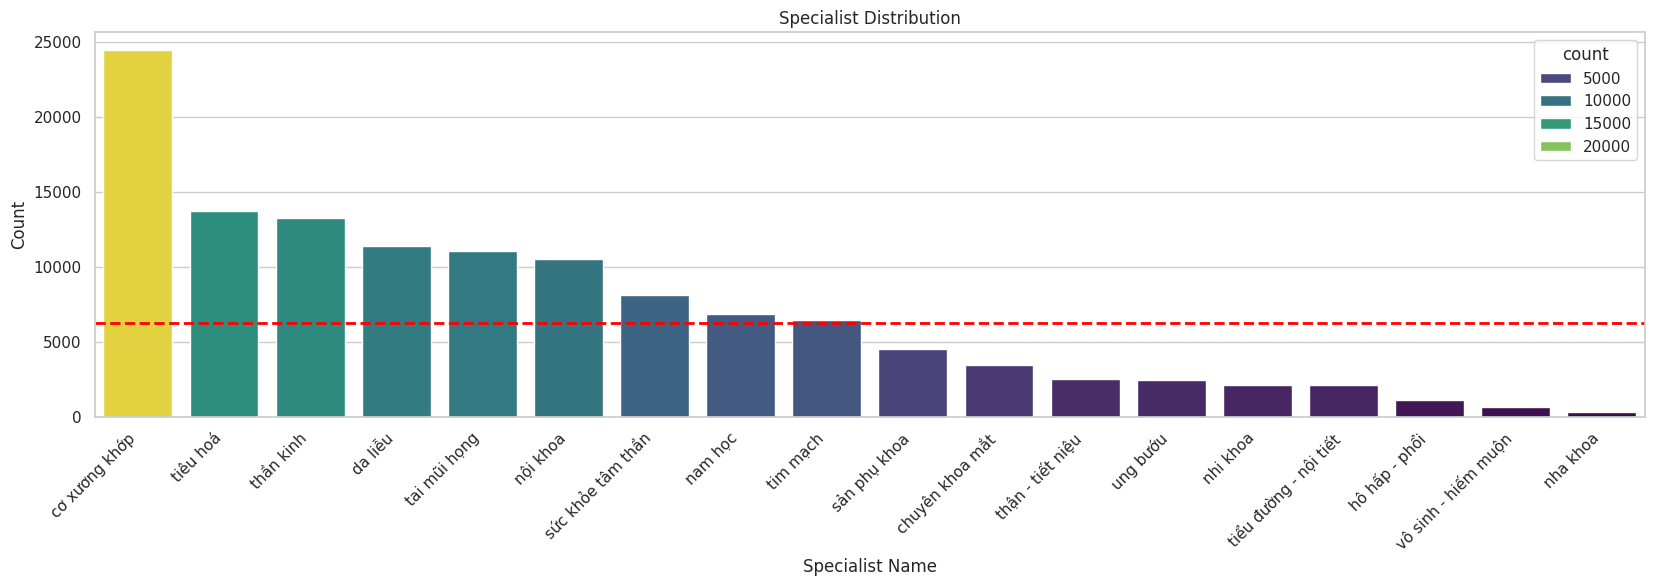

In [50]:
fig, ax = plt.subplots(figsize=(20, 5))

sns.set_theme(style="whitegrid")
sns.barplot(x="specialist_name", y="count", data=top_20_class_df, palette="viridis", hue="count")
plt.xticks(rotation=45, ha='right')

plt.axhline(average_schedule_over_specialist, color='red', linestyle="dashed", linewidth=2, label=f"Avg: {average_schedule_over_specialist:.2f}")

plt.xlabel('Specialist Name')
plt.ylabel('Count')
plt.title('Specialist Distribution')

plt.show()

In [51]:
# unwanted_specialists = ['bệnh viêm gan']

# specialist_labels = top_20_class_df[~top_20_class_df["specialist_name"].isin(unwanted_specialists)]

In [52]:
specialist_labels = top_20_class_df
specialist_labels

,specialist_id,count,specialist_name
0,1,24453,cơ xương khớp
1,22,13746,tiêu hoá
2,18,13298,thần kinh
3,11,11419,da liễu
4,4,11088,tai mũi họng
5,17,10515,nội khoa
6,27,8132,sức khỏe tâm thần
7,26,6883,nam học
8,3,6452,tim mạch
9,19,4535,sản phụ khoa


In [53]:
specialist_labels.to_csv('../data/specialist_labels.csv')

In [54]:
specialist_id = specialist_labels.specialist_id

In [55]:
specialist_id

0      1
1     22
2     18
3     11
4      4
5     17
6     27
7     26
8      3
9     19
10    29
11    32
12    15
13     5
14    21
15    43
16    67
17    33
Name: specialist_id, dtype: int64

In [56]:
features['specialist_id'].unique()

array([22,  1,  3, 18,  4,  5, 19, 17, 15, 26, 11, 27, 29, 32, 21, 33, 43,
       67])

In [57]:
features = features[features['specialist_id'].isin(specialist_id)]

In [58]:
features.shape

(125396, 7)

In [59]:
features.head()

,partner_id,specialist_id,status,gender,province_id,age,reason_combind
0,2,22,2,NaN,1,38,khám tiêu hóa
1,2,1,2,NaN,1,29,"đau lưng nhiều,ngồi lâu cứng lưng"
2,4,3,2,NaN,40,29,"hở van tim 3 lá,ngoại tâm thu"
3,17,3,2,NaN,10,40,"đau tức ngực bên trái,cảm giác hồi hộp"
4,17,3,2,NaN,-1,70,cao huyết áp


In [60]:
features['specialist_name'] = features['specialist_id'].astype(str).map(specialist_map)

In [61]:
features.to_csv('../data/dataset.csv')

In [62]:
features.shape

(125396, 8)

### Analysis of reasons for examination by specialties

Total records for Cơ xương khớp specialty: 24453


/tmp/ipykernel_8908/1710047501.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reasons.values, y=top_reasons.index, palette="viridis")


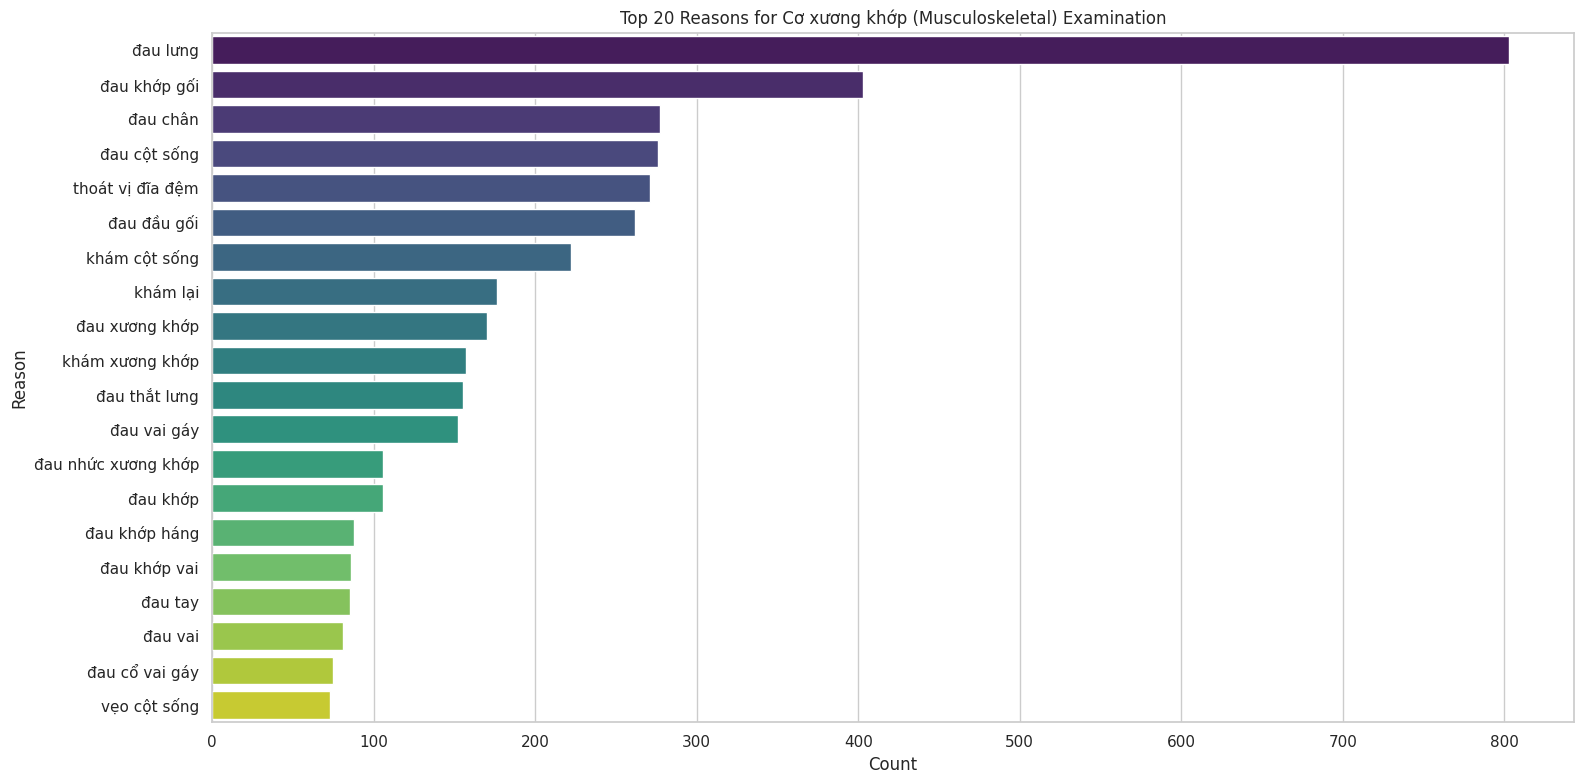


Sample reasons for Cơ xương khớp examination:
['cong vẹo cột sống' 'khám bệnh cột sống (phình đĩa đệm)' 'chân bên trái'
 'bị ngã ngồi bệt'
 'ngã cách đây nửa tháng, bs tiêm vào cột sống giờ đau buốt  không đi lại được'
 'đau cổ,đau lưng' 'trật tay' 'đầu gót chân, sưng mắt cá chân'
 'vẹo cột sống' 'bị gãy khủy tay trái']


In [63]:
# Create a dataframe for "Cơ xương khớp" specialty (specialist_id = 1)
co_xuong_khop_df = features[features['specialist_id'] == 1]
print(f"Total records for Cơ xương khớp specialty: {len(co_xuong_khop_df)}")

# Show the top 20 most common reasons
plt.figure(figsize=(16, 8))
top_reasons = co_xuong_khop_df['reason_combind'].value_counts().head(20)
sns.barplot(x=top_reasons.values, y=top_reasons.index, palette="viridis")
plt.title('Top 20 Reasons for Cơ xương khớp (Musculoskeletal) Examination')
plt.xlabel('Count')
plt.ylabel('Reason')
plt.tight_layout()
plt.show()

# Looking at some sample reasons
print("\nSample reasons for Cơ xương khớp examination:")
print(co_xuong_khop_df['reason_combind'].sample(10).values)

# Save to CSV for further analysis
co_xuong_khop_df.to_csv('../data/co_xuong_khop_data.csv')

In [64]:
# Calculate the sum count of top 20 most common reasons in co_xuong_khop_df
top_20_reasons_count = co_xuong_khop_df['reason_combind'].value_counts().head(20).sum()
total_reasons_count = len(co_xuong_khop_df)
percentage = (top_20_reasons_count / total_reasons_count) * 100

print(f"Sum of top 20 most common reasons: {top_20_reasons_count}")
print(f"Total number of records: {total_reasons_count}")
print(f"Percentage of records covered by top 20 reasons: {percentage:.2f}%")

Sum of top 20 most common reasons: 4024
Total number of records: 24453
Percentage of records covered by top 20 reasons: 16.46%


In [65]:
# Get the top 1000 reasons for examination in cơ xương khớp specialty
top_1000_reasons = co_xuong_khop_df['reason_combind'].value_counts().head(1000)

# Calculate statistics about these top 1000 reasons
top_1000_count = top_1000_reasons.sum()
total_count = len(co_xuong_khop_df)
coverage_percentage = (top_1000_count / total_count) * 100

print(f"Number of unique reasons in top 1000: {len(top_1000_reasons)}")
print(f"Total records covered by top 1000 reasons: {top_1000_count}")
print(f"Percentage of all records covered: {coverage_percentage:.2f}%")

# Sample view of top reasons
print("\nTop 10 most common reasons:")
print(top_1000_reasons.head(10))

# Save the top 1000 reasons to CSV for further analysis
top_1000_reasons.to_csv('../data/co_xuong_khop_top_1000_reasons.csv')

Number of unique reasons in top 1000: 1000
Total records covered by top 1000 reasons: 9486
Percentage of all records covered: 38.79%

Top 10 most common reasons:
reason_combind
đau lưng            803
đau khớp gối        403
đau chân            277
đau cột sống        276
thoát vị đĩa đệm    271
đau đầu gối         262
khám cột sống       222
khám lại            176
đau xương khớp      170
khám xương khớp     157
Name: count, dtype: int64


In [66]:
print(f"shape of co_xuong_khop_df: {co_xuong_khop_df.shape}")

shape of co_xuong_khop_df: (24453, 8)


In [67]:
# deduplicate using semhash
records = co_xuong_khop_df.to_dict(orient="records")
semhash = SemHash.from_records(records=records, columns=["reason_combind"], model=m2v_model)

depduplicated_records = semhash.self_deduplicate(threshold=0.9).deduplicated

co_xuong_khop_df = pd.DataFrame(depduplicated_records)

In [68]:
print(f"shape of co_xuong_khop_df after deduplicate: {co_xuong_khop_df.shape}")

shape of co_xuong_khop_df after deduplicate: (9164, 8)


In [69]:
co_xuong_khop_df.to_csv('../data/co_xuong_khop_deduplicate.csv')

Total records for thần kinh specialty: 13298


/tmp/ipykernel_11140/4147297749.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reasons.values, y=top_reasons.index, palette="viridis")


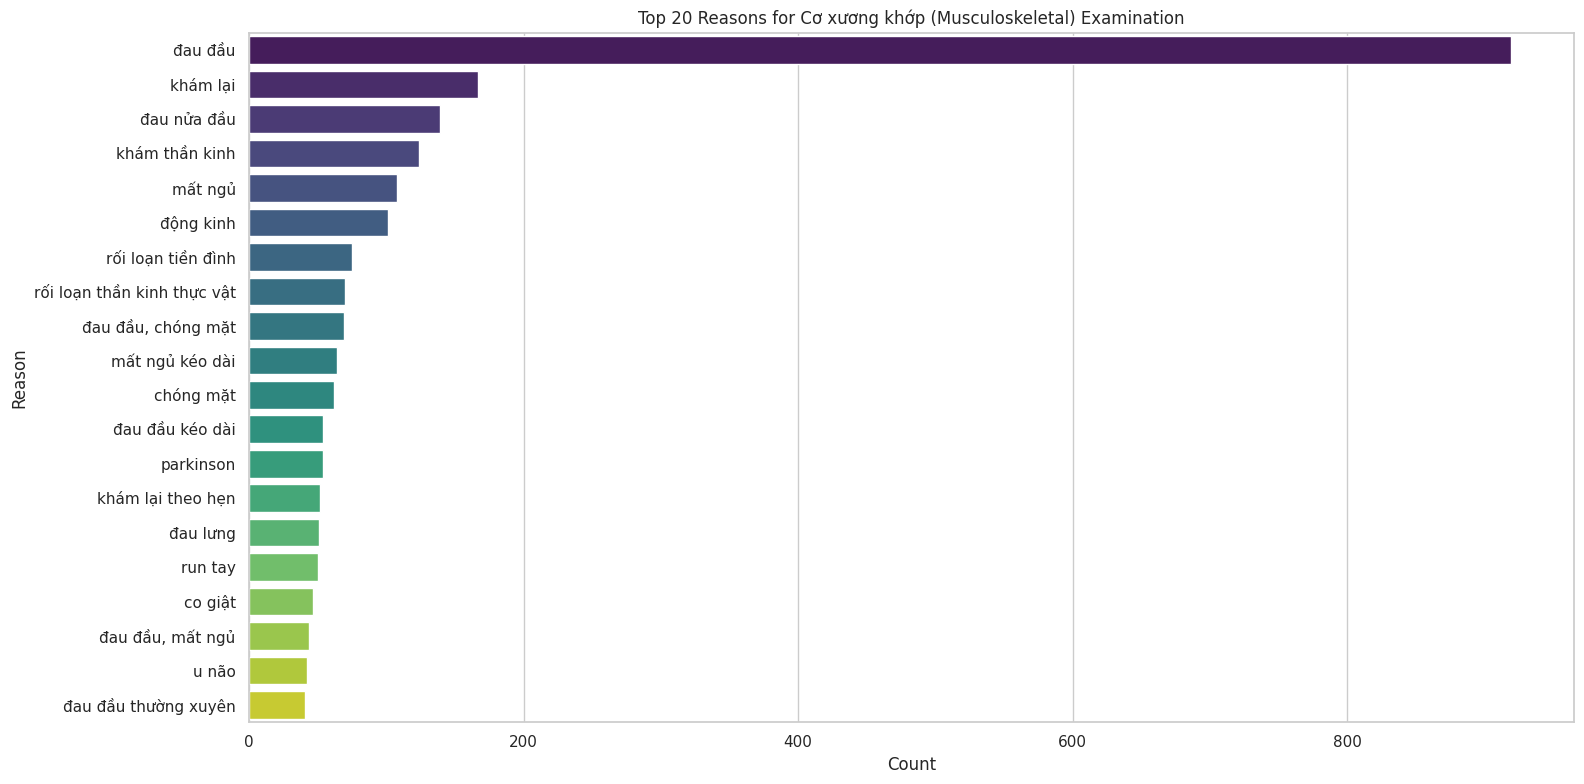


Sample reasons for Cơ xương khớp examination:
['đau đầu ,chóng mặt ,buồn nôn, đau mỏi tay chân, mất ngủ.' 'parkinson'
 'méo miệng' 'đau nửa đầu' 'thường xuyên đau đầu' 'cháu bị méo miệng'
 'đau đầu' 'đau đầu, giảm tri nhớ' 'bệnh run chân tay' 'đau đầu dữ dội']


In [70]:
than_kinh_df = features[features['specialist_id'] == 18]
print(f"Total records for thần kinh specialty: {len(than_kinh_df)}")

# Show the top 20 most common reasons
plt.figure(figsize=(16, 8))
top_reasons = than_kinh_df['reason_combind'].value_counts().head(20)
sns.barplot(x=top_reasons.values, y=top_reasons.index, palette="viridis")
plt.title('Top 20 Reasons for Cơ xương khớp (Musculoskeletal) Examination')
plt.xlabel('Count')
plt.ylabel('Reason')
plt.tight_layout()
plt.show()

# Looking at some sample reasons
print("\nSample reasons for Cơ xương khớp examination:")
print(than_kinh_df['reason_combind'].sample(10).values)

# Save to CSV for further analysis
than_kinh_df.to_csv('../data/than_kinh_data.csv')

In [71]:
# Calculate the sum count of top 20 most common reasons in co_xuong_khop_df
top_20_reasons_count = than_kinh_df['reason_combind'].value_counts().head(20).sum()
total_reasons_count = len(than_kinh_df)
percentage = (top_20_reasons_count / total_reasons_count) * 100

print(f"Sum of top 20 most common reasons: {top_20_reasons_count}")
print(f"Total number of records: {total_reasons_count}")
print(f"Percentage of records covered by top 20 reasons: {percentage:.2f}%")

Sum of top 20 most common reasons: 2333
Total number of records: 13298
Percentage of records covered by top 20 reasons: 17.54%


In [72]:
# Get the top 1000 reasons for examination in cơ xương khớp specialty
top_1000_reasons = than_kinh_df['reason_combind'].value_counts().head(1000)

# Calculate statistics about these top 1000 reasons
top_1000_count = top_1000_reasons.sum()
total_count = len(than_kinh_df)
coverage_percentage = (top_1000_count / total_count) * 100

print(f"Number of unique reasons in top 1000: {len(top_1000_reasons)}")
print(f"Total records covered by top 1000 reasons: {top_1000_count}")
print(f"Percentage of all records covered: {coverage_percentage:.2f}%")

# Sample view of top reasons
print("\nTop 10 most common reasons:")
print(top_1000_reasons.head(10))

# Save the top 1000 reasons to CSV for further analysis
top_1000_reasons.to_csv('../data/than_kinh_top_1000_reasons.csv')

Number of unique reasons in top 1000: 1000
Total records covered by top 1000 reasons: 5563
Percentage of all records covered: 41.83%

Top 10 most common reasons:
reason_combind
đau đầu                        919
khám lại                       167
đau nửa đầu                    139
khám thần kinh                 124
mất ngủ                        108
động kinh                      101
rối loạn tiền đình              75
rối loạn thần kinh thực vật     70
đau đầu, chóng mặt              69
mất ngủ kéo dài                 64
Name: count, dtype: int64


In [73]:
print(f"shape of than_kinh_df: {than_kinh_df.shape}")

shape of than_kinh_df: (13298, 8)


In [74]:
# deduplicate using semhash
records = than_kinh_df.to_dict(orient="records")
semhash = SemHash.from_records(records=records, columns=["reason_combind"], model=m2v_model)

depduplicated_records = semhash.self_deduplicate(threshold=0.95).deduplicated

than_kinh_df = pd.DataFrame(depduplicated_records)

In [75]:
print(f"shape of than_kinh_df after deduplicate: {than_kinh_df.shape}")

shape of than_kinh_df after deduplicate: (7713, 8)


In [76]:
than_kinh_df.to_csv('../data/than_kinh_deduplicate.csv')

#### Faculty of cardiology

In [77]:
tim_mach_df = features[features['specialist_id'] == 3]

In [78]:
tim_mach_df.shape

(6452, 8)

Total records for thần kinh specialty: 6452


/tmp/ipykernel_11140/1923172697.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reasons.values, y=top_reasons.index, palette="viridis")


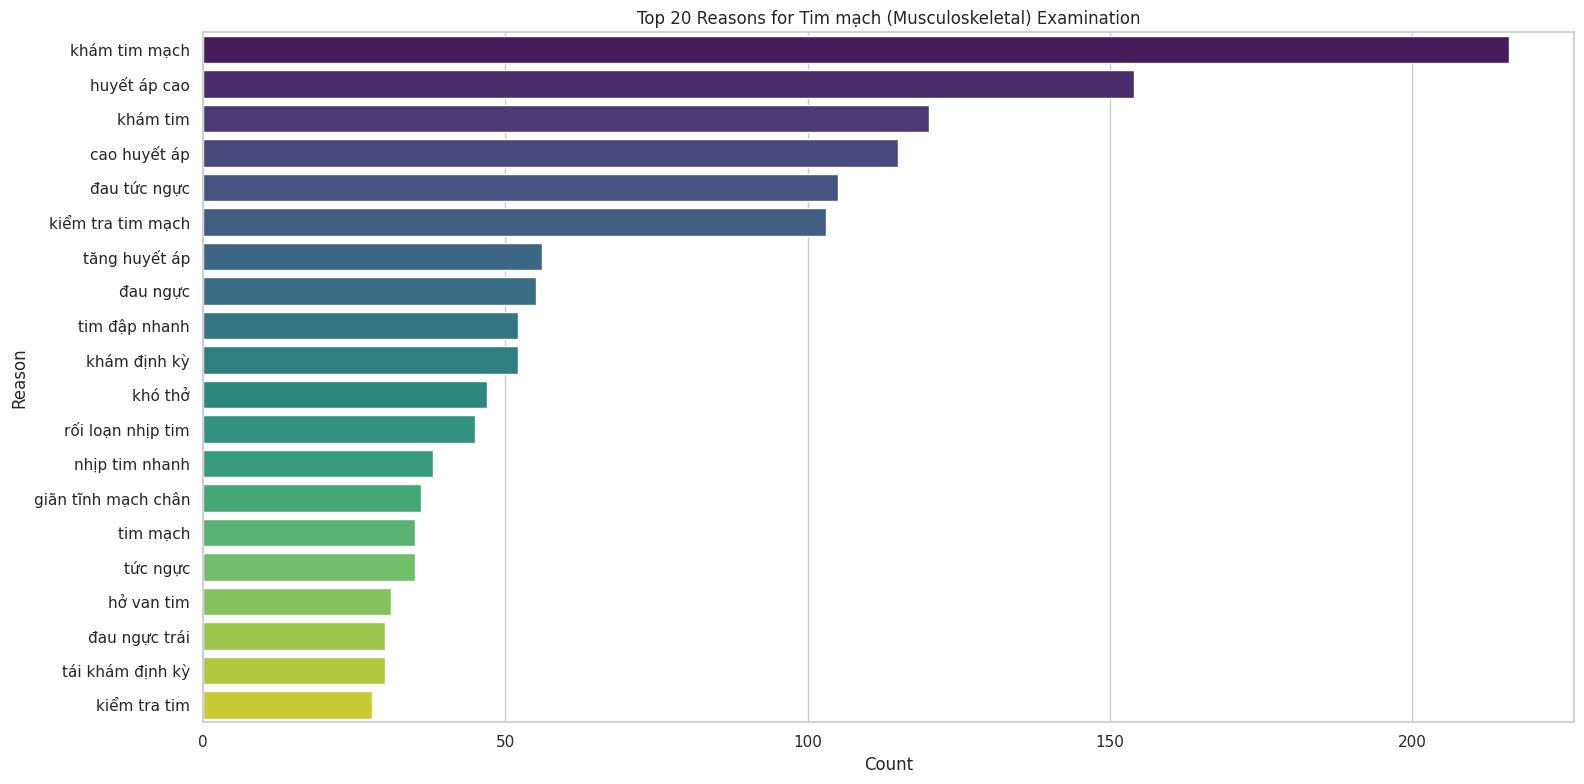


Sample reasons for Tim mạch examination:
['thông liên thất' 'khám tim mạch' 'tái khám hằng tháng'
 'nhứt đầu, chóng mặt, sây sẫm' 'kiểm tra tim mạch' 'khám tim và huyết áp'
 'bệnh nhân bị hồi hộp, mạch ở cổ to và đập mạnh' 'tái khám định kỳ'
 'đau ngực trái, tê tay trái' 'tái khám hở van tim thiếu máu cục bộ mạn']


In [79]:
print(f"Total records for thần kinh specialty: {len(tim_mach_df)}")

# Show the top 20 most common reasons
plt.figure(figsize=(16, 8))
top_reasons = tim_mach_df['reason_combind'].value_counts().head(20)
sns.barplot(x=top_reasons.values, y=top_reasons.index, palette="viridis")
plt.title('Top 20 Reasons for Tim mạch (Musculoskeletal) Examination')
plt.xlabel('Count')
plt.ylabel('Reason')
plt.tight_layout()
plt.show()

# Looking at some sample reasons
print("\nSample reasons for Tim mạch examination:")
print(tim_mach_df['reason_combind'].sample(10).values)

# Save to CSV for further analysis
than_kinh_df.to_csv('../data/tim_mach_data.csv')

In [80]:
# Calculate the sum count of top 20 most common reasons in tim_mach_df
top_20_reasons_count = tim_mach_df['reason_combind'].value_counts().head(20).sum()
total_reasons_count = len(tim_mach_df)
percentage = (top_20_reasons_count / total_reasons_count) * 100

print(f"Sum of top 20 most common reasons: {top_20_reasons_count}")
print(f"Total number of records: {total_reasons_count}")
print(f"Percentage of records covered by top 20 reasons: {percentage:.2f}%")

Sum of top 20 most common reasons: 1383
Total number of records: 6452
Percentage of records covered by top 20 reasons: 21.44%


In [81]:
# deduplicate using semhash
records = tim_mach_df.to_dict(orient="records")
semhash = SemHash.from_records(records=records, columns=["reason_combind"], model=m2v_model)

depduplicated_records = semhash.self_deduplicate(threshold=0.95).deduplicated

tim_mach_df = pd.DataFrame(depduplicated_records)
print(f"shape of tim_mach_df after deduplicate: {tim_mach_df.shape}")
tim_mach_df.to_csv('../data/tim_mach_deduplicate.csv')

shape of tim_mach_df after deduplicate: (3369, 8)


In [82]:
tai_mui_hong_df = features[features['specialist_id'] == 4]

records = tai_mui_hong_df.to_dict(orient="records")
semhash = SemHash.from_records(records=records, columns=["reason_combind"], model=m2v_model)

depduplicated_records = semhash.self_deduplicate(threshold=0.9).deduplicated

tai_mui_hong_df = pd.DataFrame(depduplicated_records)
print(f"shape of tim_mach_df after deduplicate: {tai_mui_hong_df.shape}")
tai_mui_hong_df.to_csv('../data/tai_mui_hong_deduplicate.csv')

shape of tim_mach_df after deduplicate: (4205, 8)


In [83]:
da_lieu_df = features[features['specialist_id'] == 11]

records = da_lieu_df.to_dict(orient="records")
semhash = SemHash.from_records(records=records, columns=["reason_combind"], model=m2v_model)

depduplicated_records = semhash.self_deduplicate(threshold=0.9).deduplicated

da_lieu_df = pd.DataFrame(depduplicated_records)
print(f"shape of tim_mach_df after deduplicate: {da_lieu_df.shape}")
da_lieu_df.to_csv('../data/da_lieu_deduplicate.csv')

shape of tim_mach_df after deduplicate: (5524, 8)


In [84]:
suc_khoe_tam_than_df = features[features['specialist_id'] == 27]

records = suc_khoe_tam_than_df.to_dict(orient="records")
semhash = SemHash.from_records(records=records, columns=["reason_combind"], model=m2v_model)

depduplicated_records = semhash.self_deduplicate(threshold=0.9).deduplicated

suc_khoe_tam_than_df = pd.DataFrame(depduplicated_records)
print(f"shape of suc khoe tam than after deduplicate: {suc_khoe_tam_than_df.shape}")
suc_khoe_tam_than_df.to_csv('../data/suc_khoe_tam_than_deduplicate.csv')

shape of suc khoe tam than after deduplicate: (3393, 8)


In [85]:
nam_hoc_df = features[features['specialist_id'] == 26]

records = nam_hoc_df.to_dict(orient="records")
semhash = SemHash.from_records(records=records, columns=["reason_combind"], model=m2v_model)

depduplicated_records = semhash.self_deduplicate(threshold=0.9).deduplicated

nam_hoc_df = pd.DataFrame(depduplicated_records)
print(f"shape of nam hoc after deduplicate: {nam_hoc_df.shape}")
nam_hoc_df.to_csv('../data/nam_hoc_deduplicate.csv')

shape of nam hoc after deduplicate: (2443, 8)


In [86]:
chuyen_khoa_mat_df = features[features['specialist_id'] == 29]

records = chuyen_khoa_mat_df.to_dict(orient="records")
semhash = SemHash.from_records(records=records, columns=["reason_combind"], model=m2v_model)

depduplicated_records = semhash.self_deduplicate(threshold=0.9).deduplicated

chuyen_khoa_mat_df = pd.DataFrame(depduplicated_records)
print(f"shape of chuyen khoa mat after deduplicate: {chuyen_khoa_mat_df.shape}")
chuyen_khoa_mat_df.to_csv('../data/chuyen_khoa_mat_deduplicate.csv')

shape of chuyen khoa mat after deduplicate: (1655, 8)


In [87]:
san_phu_khoa_df = features[features['specialist_id'] == 19]

records = san_phu_khoa_df.to_dict(orient="records")
semhash = SemHash.from_records(records=records, columns=["reason_combind"], model=m2v_model)

depduplicated_records = semhash.self_deduplicate(threshold=0.9).deduplicated

san_phu_khoa_df = pd.DataFrame(depduplicated_records)
print(f"shape of san phu khoa after deduplicate: {san_phu_khoa_df.shape}")
san_phu_khoa_df.to_csv('../data/san_phu_khoa_deduplicate.csv')

shape of san phu khoa after deduplicate: (1694, 8)


In [88]:
vo_sinh_hiem_muon_df = features[features['specialist_id'] == 67]

records = vo_sinh_hiem_muon_df.to_dict(orient="records")
semhash = SemHash.from_records(records=records, columns=["reason_combind"], model=m2v_model)

depduplicated_records = semhash.self_deduplicate(threshold=0.9).deduplicated

vo_sinh_hiem_muon_df = pd.DataFrame(depduplicated_records)
print(f"shape of san phu khoa after deduplicate: {vo_sinh_hiem_muon_df.shape}")
vo_sinh_hiem_muon_df.to_csv('../data/vo_sinh_hiem_muon_deduplicate.csv')

shape of san phu khoa after deduplicate: (270, 8)


In [89]:
noi_khoa_df = features[features['specialist_id'] == 17]

records = noi_khoa_df.to_dict(orient="records")
semhash = SemHash.from_records(records=records, columns=["reason_combind"], model=m2v_model)

depduplicated_records = semhash.self_deduplicate(threshold=0.9).deduplicated

noi_khoa_df = pd.DataFrame(depduplicated_records)
print(f"shape of san phu khoa after deduplicate: {noi_khoa_df.shape}")
noi_khoa_df.to_csv('../data/noi_khoa_deduplicate.csv')

shape of san phu khoa after deduplicate: (4621, 8)


In [90]:
nhi_khoa_df = features[features['specialist_id'] == 5]

records = nhi_khoa_df.to_dict(orient='records')
semhash = SemHash.from_records(records=records, columns=['reason_combind'], model=m2v_model)

deduplicated_records = semhash.self_deduplicate(threshold=0.9).deduplicated

nhi_khoa_df = pd.DataFrame(deduplicated_records)
print(f"shape of nhi khoa after deduplicate: {nhi_khoa_df.shape}")
nhi_khoa_df.to_csv('../data/nhi_khoa_deduplicate.csv')

shape of nhi khoa after deduplicate: (1481, 8)


In [63]:
# Apply function to check if predicted specialist matches actual specialist
def get_expected_outcome(row):
    predicted_specialists = get_specialist_id(row['reason_combind'])  # This returns a list of int
    return 1 if row['specialist_id'] in predicted_specialists else 0


In [ ]:

nhi_khoa_df['correct_prediction'] = nhi_khoa_df.apply(get_expected_outcome, axis=1)
print(f"Accuracy for Nhi Khoa: {nhi_khoa_df['correct_prediction'].mean() * 100:.2f}%")

In [93]:
nhi_khoa_df.head()

,partner_id,specialist_id,status,gender,province_id,age,reason_combind,specialist_name,correct_prediction
0,9,5,2,NaN,10,8,viêm a mãn tính,nhi khoa,1
1,5,5,2,NaN,36,3,"ho,sốt,viêm a",nhi khoa,0
2,9,5,2,NaN,-1,6,đi khám kl bị đau dạ dày,nhi khoa,1
3,9,5,2,NaN,25,0,men gan tăng,nhi khoa,0
4,9,5,2,NaN,8,0,"đi ngoài màu vàng,có ăn sữa ngoài",nhi khoa,1


In [94]:
# Sort the dataframe by the correct_prediction column in descending order
nhi_khoa_df = nhi_khoa_df.sort_values(by='correct_prediction', ascending=False)

# Display the first few rows to see correctly predicted cases first
print("Correctly predicted cases (sample):")
print(nhi_khoa_df.head())

# Display some incorrectly predicted cases
print("\nIncorrectly predicted cases (sample):")
print(nhi_khoa_df[nhi_khoa_df['correct_prediction'] == 0].head())

Correctly predicted cases (sample):
      partner_id  specialist_id  status  gender  province_id  age  \
1480         259              5       2     0.0           56    0   
0              9              5       2     NaN           10    8   
1478         459              5       2     0.0           79    0   
2              9              5       2     NaN           -1    6   
1476           8              5       2     0.0            1    0   

                                         reason_combind specialist_name  \
1480                            nóng người chảy máu cam        nhi khoa   
0                                     viêm a mãn tính        nhi khoa   
1478                             đau bụng vào buổi sáng        nhi khoa   
2                          đi khám kl bị đau dạ dày        nhi khoa   
1476  con bị khó ngủ, chậm tăng cân, đổ nhiều mồ hôi...        nhi khoa   

      correct_prediction  
1480                   1  
0                      1  
1478             

In [95]:
nhi_khoa_df.head()

,partner_id,specialist_id,status,gender,province_id,age,reason_combind,specialist_name,correct_prediction
1480,259,5,2,0.0,56,0,nóng người chảy máu cam,nhi khoa,1
0,9,5,2,NaN,10,8,viêm a mãn tính,nhi khoa,1
1478,459,5,2,0.0,79,0,đau bụng vào buổi sáng,nhi khoa,1
2,9,5,2,NaN,-1,6,đi khám kl bị đau dạ dày,nhi khoa,1
1476,8,5,2,0.0,1,0,"con bị khó ngủ, chậm tăng cân, đổ nhiều mồ hôi...",nhi khoa,1


In [96]:
nhi_khoa_df.to_csv('../data/nhi_khoa_deduplicate.csv')

In [97]:
ung_buou_df = features[features['specialist_id'] == 15]

records = ung_buou_df.to_dict(orient='records')
semhash = SemHash.from_records(records=records, columns=['reason_combind'], model=m2v_model)

deduplicated_records = semhash.self_deduplicate(threshold=0.9).deduplicated

ung_buou_df = pd.DataFrame(deduplicated_records)
print(f"shape of ung buou after deduplicate: {ung_buou_df.shape}")
ung_buou_df.to_csv('../data/ung_buou_deduplicate.csv')

shape of ung buou after deduplicate: (1436, 8)


In [99]:
ung_buou_df['correct_prediction'] = ung_buou_df.apply(get_expected_outcome, axis=1)
print(f"Accuracy for ung buou: {ung_buou_df['correct_prediction'].mean() * 100:.2f}%")

Accuracy for ung buou: 71.80%


In [100]:
ung_buou_df.to_csv('../data/ung_buou_deduplicate.csv')

In [64]:
nha_khoa_df = features[features['specialist_id'] == 33]

nha_khoa_df.to_csv('../data/nha_khoa_df.csv')

In [63]:
tieu_hoa_df = features[features['specialist_id'] == 22]

records = tieu_hoa_df.to_dict(orient='records')
semhash = SemHash.from_records(records=records, columns=['reason_combind'], model=m2v_model)

deduplicated_records = semhash.self_deduplicate(threshold=0.9).deduplicated

tieu_hoa_df = pd.DataFrame(deduplicated_records)
print(f"shape of tieu hoa after deduplicate: {tieu_hoa_df.shape}")
tieu_hoa_df.to_csv('../data/tieu_hoa_deduplicate.csv')

shape of tieu hoa after deduplicate: (5289, 8)


In [66]:
from math import ceil

async def apply_specialist_ids_to_df(
    df: pd.DataFrame,
    column_name: str = "reason_combind",
    batch_size: int = 32,
) -> pd.DataFrame:
    all_results = []
    n_rows = len(df)
    n_batches = ceil(n_rows / batch_size)

    for i in tqdm(range(n_batches)):
        batch = df.iloc[i * batch_size : (i + 1) * batch_size]
        queries = batch[column_name].tolist()
        results = await get_specialist_ids(queries, max_retries=5, retry_delay=30)
        all_results.extend(results)

    results_df = pd.DataFrame(all_results)
    df = df.reset_index(drop=True)
    df = pd.concat([df, results_df], axis=1)
    return df

In [67]:
tieu_hoa_df = await apply_specialist_ids_to_df(
    tieu_hoa_df,
    batch_size=64,
)

  0%|          | 0/83 [00:00<?, ?it/s]

In [68]:
tieu_hoa_df

,partner_id,specialist_id,status,gender,province_id,age,reason_combind,specialist_name,ids,logs
0,2,22,2,NaN,1,38,khám tiêu hóa,tiêu hoá,[22],Query: khám tiêu hóa\nPrediction probabiliti...
1,2,22,2,NaN,36,40,đau dạ dày,tiêu hoá,[22],Query: đau dạ dày\nPrediction probabilities:...
2,8,22,2,NaN,1,38,"đaị trực tràng ,tiêu hóa",tiêu hoá,[22],"Query: đaị trực tràng ,tiêu hóa\nPredictio..."
3,3,22,2,NaN,-1,71,muốn nội soi đại tràng không gây mê,tiêu hoá,[22],Query: muốn nội soi đại tràng không gây mê...
4,1,22,2,NaN,1,40,đi ra máu tươi,tiêu hoá,[22],Query: đi ra máu tươi\nPrediction probabiliti...
...,...,...,...,...,...,...,...,...,...,...
5284,111,22,2,0.0,67,0,cắt trị,tiêu hoá,[22],Query: cắt trị\nPrediction probabilities:\ntiê...
5285,111,22,2,0.0,74,0,khám ung thư gan,tiêu hoá,[15],Query: khám ung thư gan\nPrediction probabilit...
5286,111,22,2,0.0,74,0,tái khám định kỳ sau phẫu thuật đại tràng.,tiêu hoá,[22],Query: tái khám định kỳ sau phẫu thuật đại trà...
5287,111,22,2,1.0,83,0,đăng kí nhập viện,tiêu hoá,[17],Query: đăng kí nhập viện\nPrediction probabili...


In [69]:
# Define function to check if specialist_id is in the list of predicted ids
def evaluate_prediction_accuracy(row):
    # Check if 'ids' column exists and is a list
    if 'ids' in row and isinstance(row['ids'], list):
        # Check if the true specialist_id is in the predicted ids
        return 1 if row['specialist_id'] in row['ids'] else 0
    return 0

# Apply the function to the dataframe
tieu_hoa_df['correct_prediction'] = tieu_hoa_df.apply(evaluate_prediction_accuracy, axis=1)

# Calculate and print the accuracy
accuracy = tieu_hoa_df['correct_prediction'].mean() * 100
print(f"Accuracy for Tiêu hóa: {accuracy:.2f}%")

# Show some examples of correct and incorrect predictions
print("\nCorrectly predicted examples:")
print(tieu_hoa_df[tieu_hoa_df['correct_prediction'] == 1].head()[['reason_combind', 'specialist_id', 'ids']])

print("\nIncorrectly predicted examples:")
print(tieu_hoa_df[tieu_hoa_df['correct_prediction'] == 0].head()[['reason_combind', 'specialist_id', 'ids']])


Accuracy for Tiêu hóa: 77.71%

Correctly predicted examples:
                            reason_combind  specialist_id   ids
0                          khám tiêu hóa             22  [22]
1                             đau dạ dày             22  [22]
2             đaị trực tràng ,tiêu hóa             22  [22]
3  muốn nội soi đại tràng không gây mê             22  [22]
4                          đi ra máu tươi             22  [22]

Incorrectly predicted examples:
             reason_combind  specialist_id   ids
15  khám sức khỏe tổng quát             22  [17]
20        khám lại theo hẹn             22    []
21        đau bụng từng cơn             22  [19]
32         đau bủng kéo dài             22    []
34                 tiêu hóa             22  [17]


In [70]:
tieu_hoa_df.to_csv('../data/tieu_hoa_deduplicate.csv')

In [72]:
tieu_duong_noi_tiet_df = features[features['specialist_id'] == 21]

records = tieu_duong_noi_tiet_df.to_dict(orient='records')
semhash = SemHash.from_records(records=records, columns=['reason_combind'], model=m2v_model)

deduplicated_records = semhash.self_deduplicate(threshold=0.9).deduplicated

tieu_duong_noi_tiet_df = pd.DataFrame(deduplicated_records)
print(f"shape of tieu duong noi tiet after deduplicate: {tieu_duong_noi_tiet_df.shape}")
tieu_duong_noi_tiet_df.to_csv('../data/tieu_duong_noi_tiet_deduplicate.csv')

shape of tieu duong noi tiet after deduplicate: (865, 8)


In [73]:
tieu_duong_noi_tiet_df = await apply_specialist_ids_to_df(
    tieu_duong_noi_tiet_df,
    batch_size=64,
)

  0%|          | 0/14 [00:00<?, ?it/s]

In [74]:
tieu_duong_noi_tiet_df['correct_prediction'] = tieu_duong_noi_tiet_df.apply(evaluate_prediction_accuracy, axis=1)

# Calculate and print the accuracy
accuracy = tieu_duong_noi_tiet_df['correct_prediction'].mean() * 100
print(f"Accuracy for Tiêu hóa: {accuracy:.2f}%")

# Show some examples of correct and incorrect predictions
print("\nCorrectly predicted examples:")
print(tieu_duong_noi_tiet_df[tieu_duong_noi_tiet_df['correct_prediction'] == 1].head()[['reason_combind', 'specialist_id', 'ids']])

print("\nIncorrectly predicted examples:")
print(tieu_duong_noi_tiet_df[tieu_duong_noi_tiet_df['correct_prediction'] == 0].head()[['reason_combind', 'specialist_id', 'ids']])


Accuracy for Tiêu hóa: 65.20%

Correctly predicted examples:
                        reason_combind  specialist_id   ids
0                 kiểm tra đường huyết             21  [21]
1                   tư vấn  tiểu đường             21  [21]
2                      khám tiểu đường             21  [21]
3                           tiểu đường             21  [21]
4  kiểm tra nội tiết vì tăng cân nhanh             21  [21]

Incorrectly predicted examples:
                                       reason_combind  specialist_id   ids
6                                khám bệnh tiểu đuờng             21  [32]
18                                          khám bệnh             21    []
21  biến chứng tiểu đường, ngón chân thâm tím, đau...             21    []
27                                    sụt kg đột ngột             21  [17]
33             kiểm tra đường máu và tư vần điều trị.             21  [17]


In [75]:
tieu_duong_noi_tiet_df.to_csv('../data/tieu_duong_noi_tiet_deduplicated.csv')

In [76]:
than_tiet_nieu_df = features[features['specialist_id'] == 32]

records = than_tiet_nieu_df.to_dict(orient='records')
semhash = SemHash.from_records(records=records, columns=['reason_combind'], model=m2v_model)

deduplicated_records = semhash.self_deduplicate(threshold=0.9).deduplicated

than_tiet_nieu_df = pd.DataFrame(deduplicated_records)
print(f"shape of that tiet nieu after deduplicate: {than_tiet_nieu_df.shape}")
than_tiet_nieu_df.to_csv('../data/that_tiet_nieu_deduplicate.csv')

shape of that tiet nieu after deduplicate: (1192, 8)


In [77]:
than_tiet_nieu_df = await apply_specialist_ids_to_df(
    than_tiet_nieu_df,
    batch_size=64,
)

  0%|          | 0/19 [00:00<?, ?it/s]

In [78]:
than_tiet_nieu_df['correct_prediction'] = than_tiet_nieu_df.apply(evaluate_prediction_accuracy, axis=1)

# Calculate and print the accuracy
accuracy = than_tiet_nieu_df['correct_prediction'].mean() * 100
print(f"Accuracy for than tiet nieu: {accuracy:.2f}%")

# Show some examples of correct and incorrect predictions
print("\nCorrectly predicted examples:")
print(than_tiet_nieu_df[than_tiet_nieu_df['correct_prediction'] == 1].head()[['reason_combind', 'specialist_id', 'ids']])

print("\nIncorrectly predicted examples:")
print(than_tiet_nieu_df[than_tiet_nieu_df['correct_prediction'] == 0].head()[['reason_combind', 'specialist_id', 'ids']])


Accuracy for than tiet nieu: 80.87%

Correctly predicted examples:
                                      reason_combind  specialist_id   ids
0                                      đi tiểu nhiều             32  [32]
1                                          khám thận             32  [32]
2                               viêm đường tiết niệu             32  [32]
3                                   gan thận đa nang             32  [32]
4  1_2 năm lại bị tiểu ra máu tươi và máu cục có ...             32  [32]

Incorrectly predicted examples:
                                       reason_combind  specialist_id   ids
10                          bị tiểu buốt và dắt 3 năm             32  [26]
23                                      tức bụng dưới             32  [19]
28  sau phẫu thuật cột sống có biểu hiện đi tiểu n...             32    []
35                              đau thắt lưng kéo dài             32   [1]
42  8 tháng trước bị viêm đường tiết liệu, chỉ số ...             32    []


In [79]:
than_tiet_nieu_df.to_csv('../data/than_tiet_nieu_deduplicated.csv')

In [80]:
ho_hap_phoi_df = features[features['specialist_id'] == 43]

records = ho_hap_phoi_df.to_dict(orient='records')
semhash = SemHash.from_records(records=records, columns=['reason_combind'], model=m2v_model)

deduplicated_records = semhash.self_deduplicate(threshold=0.9).deduplicated

ho_hap_phoi_df = pd.DataFrame(deduplicated_records)
print(f"shape of ho hap phoi after deduplicate: {ho_hap_phoi_df.shape}")
ho_hap_phoi_df.to_csv('../data/ho_hap_phoi_deduplicate.csv')

shape of ho hap phoi after deduplicate: (686, 8)


In [81]:
ho_hap_phoi_df = await apply_specialist_ids_to_df(
    ho_hap_phoi_df,
    batch_size=64,
)

  0%|          | 0/11 [00:00<?, ?it/s]

In [82]:
ho_hap_phoi_df['correct_prediction'] = ho_hap_phoi_df.apply(evaluate_prediction_accuracy, axis=1)

# Calculate and print the accuracy
accuracy = ho_hap_phoi_df['correct_prediction'].mean() * 100
print(f"Accuracy for ho hap phoi: {accuracy:.2f}%")

# Show some examples of correct and incorrect predictions
print("\nCorrectly predicted examples:")
print(ho_hap_phoi_df[ho_hap_phoi_df['correct_prediction'] == 1].head()[['reason_combind', 'specialist_id', 'ids']])

print("\nIncorrectly predicted examples:")
print(ho_hap_phoi_df[ho_hap_phoi_df['correct_prediction'] == 0].head()[['reason_combind', 'specialist_id', 'ids']])


Accuracy for ho hap phoi: 76.09%

Correctly predicted examples:
                                      reason_combind  specialist_id   ids
0                                     ho hơn 10 ngày             43  [43]
2                  kiểm tra lại kết quả chụp x-quang             43  [43]
4  kiểm tra phổi , có ho khi gắn sức , như leo cầ...             43  [43]
6                                          khám phổi             43  [43]
7                hút thuốc thường, chụp x quang phổi             43  [43]

Incorrectly predicted examples:
                                       reason_combind  specialist_id   ids
1                     khó thở, nhanh mệt khi vận động             43   [3]
3                                  khó thở, tức ngực.             43    []
5                                            ho nhiều             43    []
13                                        khám phổi             43    []
17  không ngủ được, phải ngủ ngồi, ngủ nằm đau bên...             43  [18]


In [83]:
ho_hap_phoi_df.to_csv('../data/ho_hap_phoi_deduplicated.csv')

### Balance the data

In [63]:
# Ensure each specialist has maximum 2372 samples
MAX_SAMPLES_PER_SPECIALIST = 6253
specialist_counts = features['specialist_id'].value_counts()

# Create a balanced dataset by taking up to MAX_SAMPLES_PER_SPECIALIST per specialist
balanced_label_features = pd.DataFrame()
for specialist_id in specialist_counts.index:
    specialist_data = features[features['specialist_id'] == specialist_id]
    if len(specialist_data) > MAX_SAMPLES_PER_SPECIALIST:
        balanced_data = specialist_data.sample(MAX_SAMPLES_PER_SPECIALIST, random_state=42)
    else:
        balanced_data = specialist_data
    balanced_label_features = pd.concat([balanced_label_features, balanced_data])

balanced_label_features.shape
balanced_label_features.head()

,partner_id,specialist_id,status,gender,province_id,age,reason_combind,specialist_name
69524,135,1,2,1.0,36,36,khám chẩn do bị ngã xe.,cơ xương khớp
147559,299,1,2,1.0,79,0,đau đầu gối,cơ xương khớp
77536,299,1,2,0.0,95,28,ở xa,cơ xương khớp
130089,124,1,2,0.0,56,0,"đau khớp gối. phía sau gối, sợi gân nó căng, n...",cơ xương khớp
67621,10,1,2,1.0,1,48,đau thắt lưng,cơ xương khớp


In [64]:
balanced_label_features.head()

,partner_id,specialist_id,status,gender,province_id,age,reason_combind,specialist_name
69524,135,1,2,1.0,36,36,khám chẩn do bị ngã xe.,cơ xương khớp
147559,299,1,2,1.0,79,0,đau đầu gối,cơ xương khớp
77536,299,1,2,0.0,95,28,ở xa,cơ xương khớp
130089,124,1,2,0.0,56,0,"đau khớp gối. phía sau gối, sợi gân nó căng, n...",cơ xương khớp
67621,10,1,2,1.0,1,48,đau thắt lưng,cơ xương khớp


In [65]:
balanced_label_features['specialist_id'].unique()

array([ 1, 22, 18, 11,  4, 17, 27, 26,  3, 19, 29, 32, 15,  5, 21, 43, 67])

<Axes: xlabel='specialist_id', ylabel='count'>

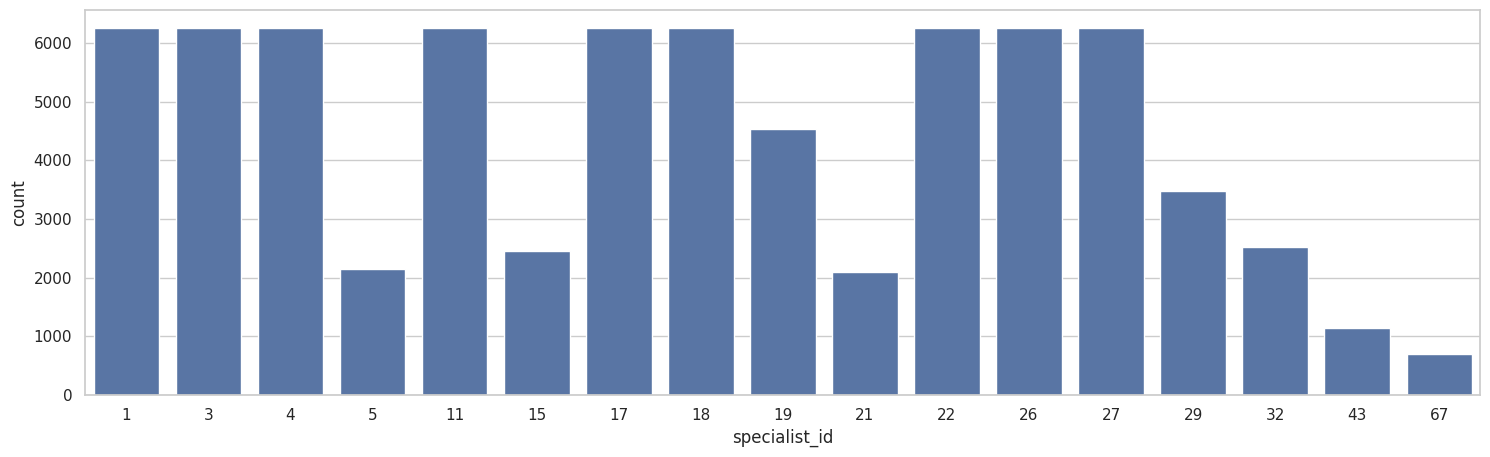

In [66]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.set_theme(style="whitegrid")
sns.countplot(x=balanced_label_features['specialist_id'])

In [67]:
balanced_label_features['specialist_id'].value_counts()

specialist_id
1     6253
22    6253
18    6253
11    6253
4     6253
17    6253
27    6253
26    6253
3     6253
19    4535
29    3486
32    2523
15    2463
5     2141
21    2104
43    1138
67     701
Name: count, dtype: int64

In [68]:
balanced_label_features['specialist_name'] = balanced_label_features['specialist_id'].astype(str).map(specialist_map)

In [69]:
balanced_label_features = balanced_label_features.drop(columns=['status'])

In [70]:
balanced_label_features.to_csv('../data/data_label_balanced.csv')

In [74]:
balanced_label_features

,partner_id,specialist_id,gender,province_id,age,reason_combind,specialist_name
69524,135,1,1.0,36,36,khám chẩn do bị ngã xe.,cơ xương khớp
147559,299,1,1.0,79,0,đau đầu gối,cơ xương khớp
77536,299,1,0.0,95,28,ở xa,cơ xương khớp
130089,124,1,0.0,56,0,"đau khớp gối. phía sau gối, sợi gân nó căng, n...",cơ xương khớp
67621,10,1,1.0,1,48,đau thắt lưng,cơ xương khớp
...,...,...,...,...,...,...,...
154161,23,67,1.0,1,0,khám hiếm muộn 2 vợ chồng,vô sinh - hiếm muộn
154175,23,67,1.0,20,0,đăng ký làm ivf,vô sinh - hiếm muộn
154338,23,67,1.0,1,0,khám sinh sản,vô sinh - hiếm muộn
154339,23,67,0.0,1,0,khám nam khoa,vô sinh - hiếm muộn


In [75]:
balanced_label_features['age'] = balanced_label_features['age'].fillna(-1).astype(int)
balanced_label_features['age'] = balanced_label_features['age'].astype(int)

In [76]:
balanced_label_features.head()

,partner_id,specialist_id,gender,province_id,age,reason_combind,specialist_name
69524,135,1,1.0,36,36,khám chẩn do bị ngã xe.,cơ xương khớp
147559,299,1,1.0,79,0,đau đầu gối,cơ xương khớp
77536,299,1,0.0,95,28,ở xa,cơ xương khớp
130089,124,1,0.0,56,0,"đau khớp gối. phía sau gối, sợi gân nó căng, n...",cơ xương khớp
67621,10,1,1.0,1,48,đau thắt lưng,cơ xương khớp


In [79]:
# Convert partner_id and specialist_id to category
balanced_label_features['partner_id'] = balanced_label_features['partner_id'].astype('category')

# Display the dtypes to verify the changes
print(balanced_label_features[['partner_id']].dtypes)


partner_id    category
dtype: object


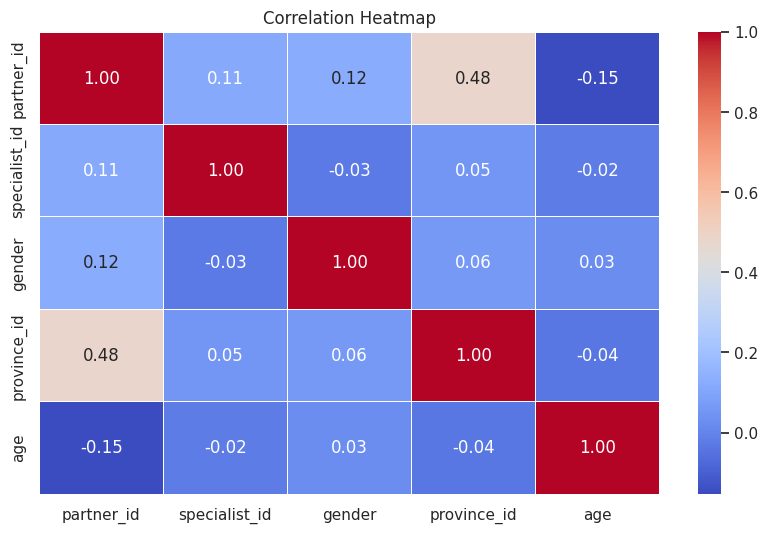

In [80]:
corr_matix = balanced_label_features.drop(columns=['reason_combind', 'specialist_name']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [81]:
balanced_label_features.head()

,partner_id,specialist_id,gender,province_id,age,reason_combind,specialist_name
69524,135,1,1.0,36,36,khám chẩn do bị ngã xe.,cơ xương khớp
147559,299,1,1.0,79,0,đau đầu gối,cơ xương khớp
77536,299,1,0.0,95,28,ở xa,cơ xương khớp
130089,124,1,0.0,56,0,"đau khớp gối. phía sau gối, sợi gân nó căng, n...",cơ xương khớp
67621,10,1,1.0,1,48,đau thắt lưng,cơ xương khớp


In [82]:
balanced_label_features = balanced_label_features.drop(columns=[
    'specialist_id', 'gender', 'province_id', 'age',
])

In [83]:
balanced_label_features.shape

(75368, 3)

In [84]:
balanced_label_features.to_csv('../data/data_label_balanced.csv')

In [95]:
balanced_label_features.specialist_name.unique()

array(['cơ xương khớp', 'tiêu hoá', 'thần kinh', 'da liễu',
       'tai mũi họng', 'nội khoa', 'sức khỏe tâm thần', 'nam học',
       'tim mạch', 'sản phụ khoa', 'chuyên khoa mắt', 'thận - tiết niệu',
       'ung bướu', 'nhi khoa', 'tiểu đường - nội tiết', 'hô hấp - phổi',
       'vô sinh - hiếm muộn'], dtype=object)

In [96]:
len(balanced_label_features.specialist_name.unique())

17

### 